# Case study on unsupervised learning

#### Try out different clustering models in the given dataset. 

#### Find the optimum number of clusters in each model and create the model with optimum number of clusters. 

#### Also learn about dB scan clustering and implement it.

### IMPORTING LIBRARIES AND LOADING THE DATASET

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

wine_data = pd.read_csv(r"C:\Users\meenu\Downloads\Wine_clust .csv")
wine_data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
wine_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [3]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
wine_data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
wine_data.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


### Preprocessing

In [6]:
wine_data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

#### Selecting the features

In [7]:
X = wine_data[['Alcohol','Magnesium']]

Y=wine_data[['Alcohol','Malic_Acid']]

#### Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

wine_scaled = scaler.fit_transform(X)

wine_scaled1 = scaler.fit_transform(Y)

## K-Means clustering

#### with features 'Alcohol' and 'Magnesium'

C:\Users\meenu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\meenu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\meenu\AppData\Local\Temp\ipykernel_2272\1116474954.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = cluster_labels


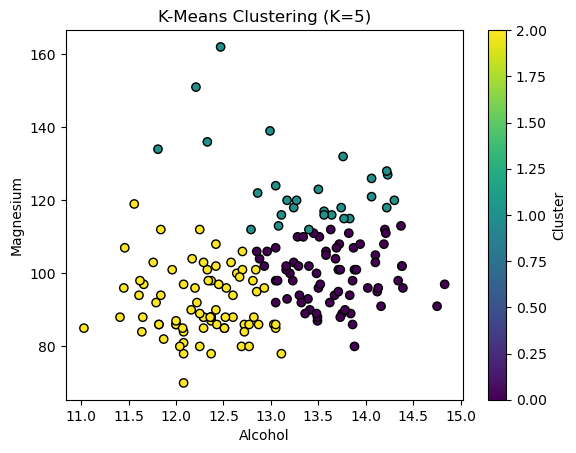

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42) 

# Fit KMeans to the scaled data
kmeans.fit(wine_scaled)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
X['Cluster'] = cluster_labels

# Visualizing the clusters
plt.scatter(X['Alcohol'], X['Magnesium'], c=cluster_labels, cmap='viridis', edgecolor='k')
plt.xlabel('Alcohol')
plt.ylabel('Magnesium')
plt.title('K-Means Clustering (K=5)')
plt.colorbar(label='Cluster')
plt.show()


C:\Users\meenu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\meenu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\meenu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\meenu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

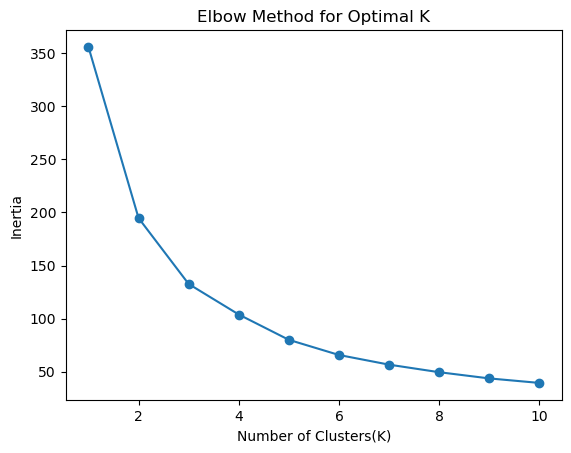

In [10]:
#Define a range of K values to test
K_range = range(1,11) 
inertia_values = []

#calculate the inertia for different values of K
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=0)
    kmeans.fit(wine_scaled)
    inertia = kmeans.inertia_
    inertia_values.append(inertia)
    
#plot the inertia values
plt.plot(K_range,inertia_values,marker="o")
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters(K)')
plt.ylabel('Inertia')
plt.show()

C:\Users\meenu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\meenu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\meenu\AppData\Local\Temp\ipykernel_2272\1378387785.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = cluster_labels


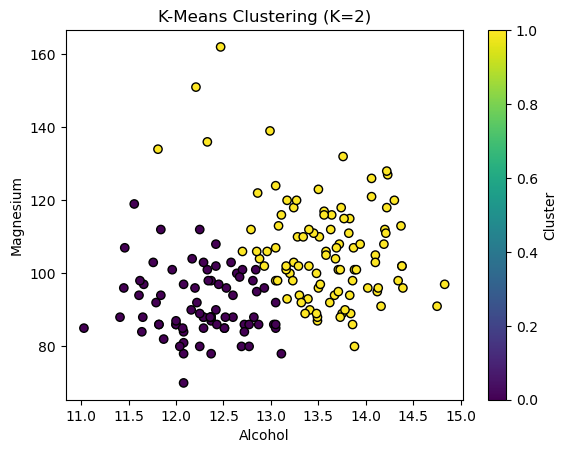

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'wine_scaled' contains the scaled data
# Initialize KMeans with the number of clusters you want
kmeans = KMeans(n_clusters=2, random_state=42) 

# Fit KMeans to the scaled data
kmeans.fit(wine_scaled)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
X['Cluster'] = cluster_labels

# Visualizing the clusters
plt.scatter(X['Alcohol'], X['Magnesium'], c=cluster_labels, cmap='viridis', edgecolor='k')
plt.xlabel('Alcohol')
plt.ylabel('Magnesium')
plt.title('K-Means Clustering (K=2)')
plt.colorbar(label='Cluster')
plt.show()


In [12]:
from sklearn.metrics import silhouette_score

# Assuming 'wine_scaled' contains the scaled data and 'cluster_labels' contains the cluster labels from K-Means
silhouette_avg = silhouette_score(wine_scaled, cluster_labels)
print(f"The silhouette score for the clustering is: {silhouette_avg}")


The silhouette score for the clustering is: 0.4171818691155081


#### with features 'Alcohol' and 'Malic Acid'

C:\Users\meenu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\meenu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\meenu\AppData\Local\Temp\ipykernel_2272\1452103362.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = cluster_labels


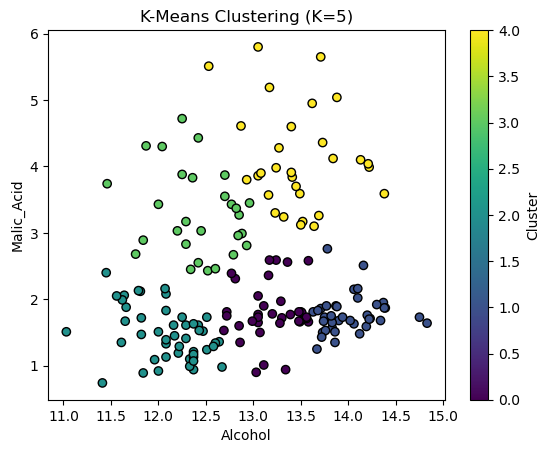

In [13]:
# Initialize KMeans with 5 number of clusters
kmeans = KMeans(n_clusters=5, random_state=42) 

# Fit KMeans to the scaled data
kmeans.fit(wine_scaled1)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
X['Cluster'] = cluster_labels

# Visualizing the clusters
plt.scatter(Y['Alcohol'], Y['Malic_Acid'], c=cluster_labels, cmap='viridis', edgecolor='k')
plt.xlabel('Alcohol')
plt.ylabel('Malic_Acid')
plt.title('K-Means Clustering (K=5)')
plt.colorbar(label='Cluster')
plt.show()

C:\Users\meenu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\meenu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\meenu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\meenu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

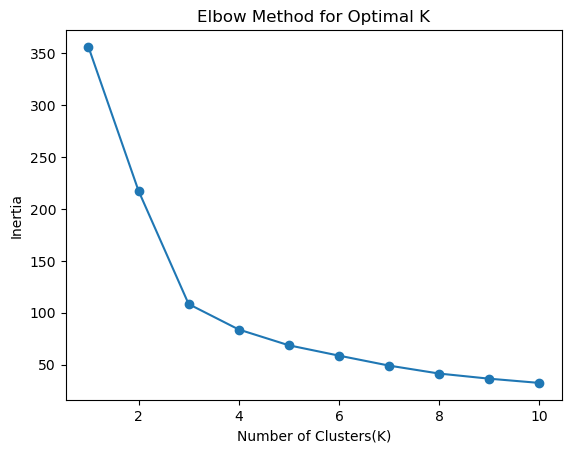

In [14]:
#Define a range of K values to test
K_range = range(1,11) 
inertia_values = []

#calculate the inertia for different values of K
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=0)
    kmeans.fit(wine_scaled1)
    inertia = kmeans.inertia_
    inertia_values.append(inertia)
    
#plot the inertia values
plt.plot(K_range,inertia_values,marker="o")
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters(K)')
plt.ylabel('Inertia')
plt.show()

C:\Users\meenu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\meenu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\meenu\AppData\Local\Temp\ipykernel_2272\576829620.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = cluster_labels


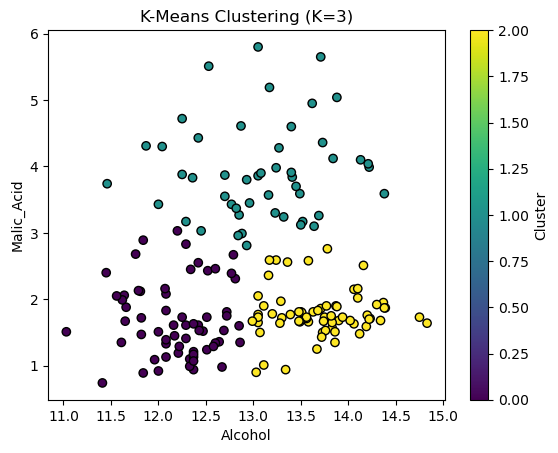

In [15]:
# Initialize KMeans with the number of clusters = 3
kmeans = KMeans(n_clusters=3, random_state=42) 

# Fit KMeans to the scaled data
kmeans.fit(wine_scaled1)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
X['Cluster'] = cluster_labels

# Visualizing the clusters
plt.scatter(Y['Alcohol'], Y['Malic_Acid'], c=cluster_labels, cmap='viridis', edgecolor='k')
plt.xlabel('Alcohol')
plt.ylabel('Malic_Acid')
plt.title('K-Means Clustering (K=3)')
plt.colorbar(label='Cluster')
plt.show()

In [16]:
silhouette_avg = silhouette_score(wine_scaled1, cluster_labels)
print(f"The silhouette score for the clustering is: {silhouette_avg}")

The silhouette score for the clustering is: 0.484095893654603


# Hierarchical Clustering

#### with features 'Alcohol' and 'Magnesium'

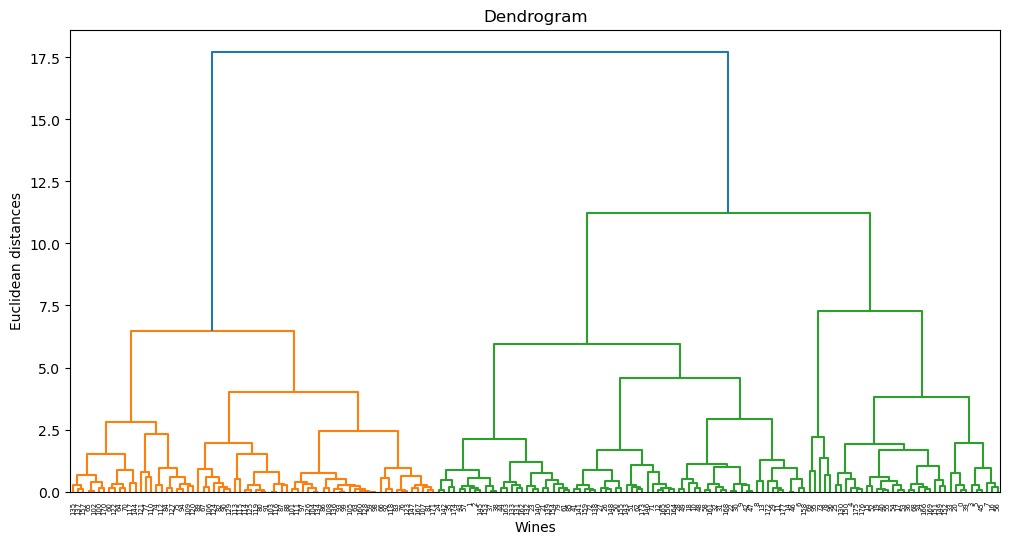

In [17]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(wine_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Wines')
plt.ylabel('Euclidean distances')
plt.show()


In [18]:
from sklearn.cluster import AgglomerativeClustering

#Initialize AgglomerativeClustering with the number of clusters=4
n_clusters = 4
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')

# Fit and predict clusters
cluster_labels1 = hc.fit_predict(wine_scaled)

C:\Users\meenu\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


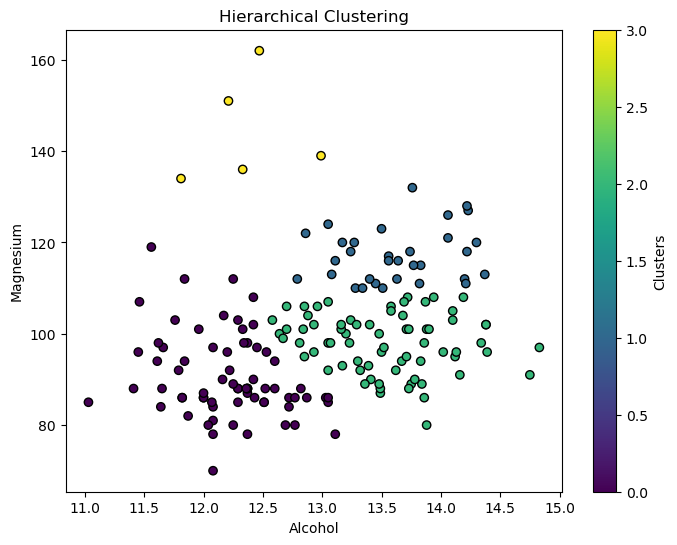

In [19]:
# Visualizing the clusters in a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X['Alcohol'], X['Magnesium'], c=cluster_labels1, cmap='viridis', edgecolor='k')
plt.xlabel('Alcohol')
plt.ylabel('Magnesium')
plt.title('Hierarchical Clustering')
plt.colorbar(label='Clusters')
plt.show()


In [20]:
silhouette_avg1 = silhouette_score(wine_scaled, cluster_labels1)
print(f"The silhouette score for the clustering is: {silhouette_avg1}")


The silhouette score for the clustering is: 0.38013285506975686


#### with features 'Alcohol' and ' Malic Acid'

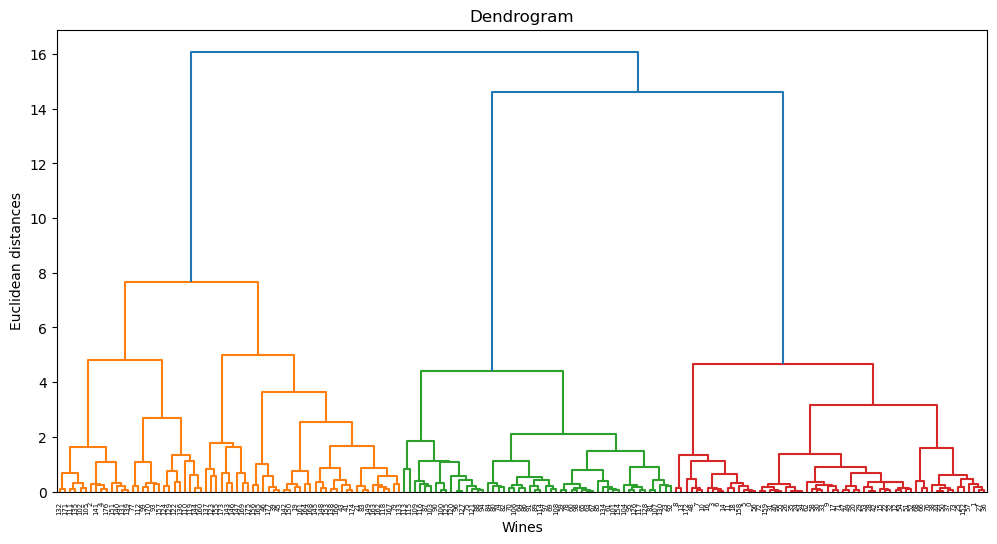

In [21]:
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(wine_scaled1, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Wines')
plt.ylabel('Euclidean distances')
plt.show()


In [22]:
#Initialize AgglomerativeClustering with the number of clusters=5
n_clusters = 5
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')

# Fit and predict clusters
cluster_labels2 = hc.fit_predict(wine_scaled1)

C:\Users\meenu\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


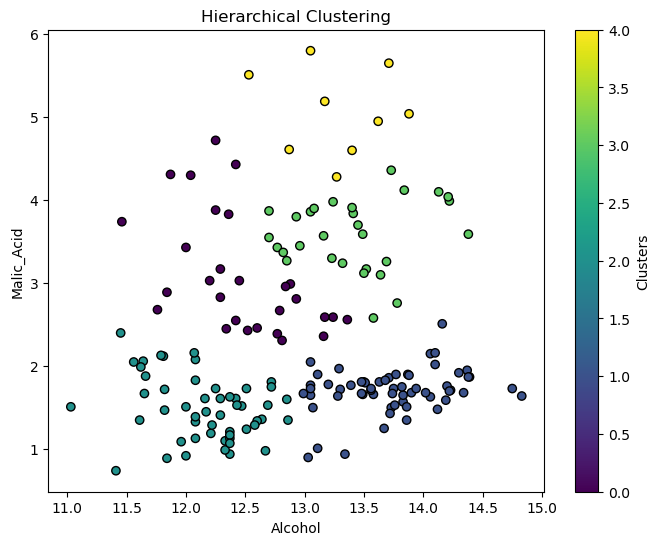

In [23]:
# Visualizing the clusters in a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Y['Alcohol'], Y['Malic_Acid'], c=cluster_labels2, cmap='viridis', edgecolor='k')
plt.xlabel('Alcohol')
plt.ylabel('Malic_Acid')
plt.title('Hierarchical Clustering')
plt.colorbar(label='Clusters')
plt.show()


In [24]:
silhouette_avg2 = silhouette_score(wine_scaled1, cluster_labels2)
print(f"The silhouette score for the clustering is: {silhouette_avg2}")


The silhouette score for the clustering is: 0.43153628486723783


# DBSCAN Clustering

#### with features 'Alcohol' and 'Magnesium'

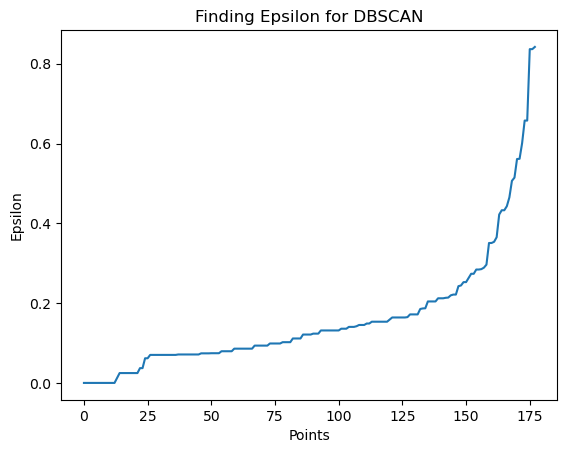

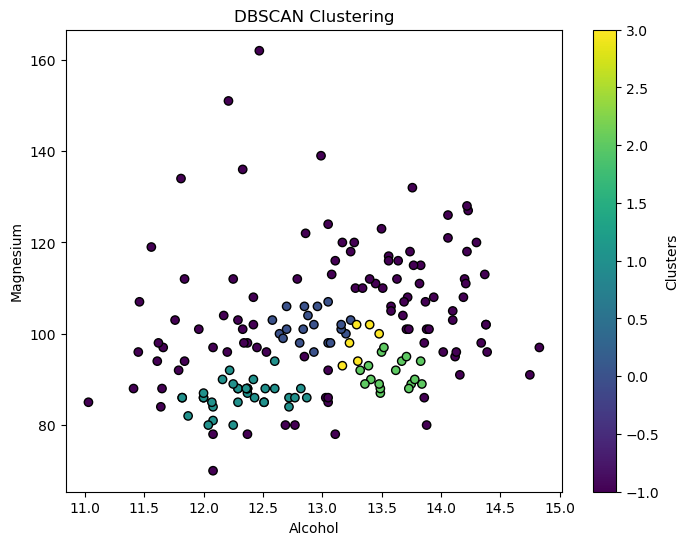

In [25]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Fit Nearest Neighbors model to find suitable epsilon value for DBSCAN
neighbors = NearestNeighbors(n_neighbors=20)  
neighbors_fit = neighbors.fit(wine_scaled)
distances, indices = neighbors_fit.kneighbors(wine_scaled)

# Sort the distances and plot to find a suitable epsilon value
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Epsilon')
plt.title('Finding Epsilon for DBSCAN')
plt.show()

# Initialize DBSCAN with the determined epsilon value
epsilon = 0.4
dbscan = DBSCAN(eps=epsilon, min_samples=15) 

# Fit DBSCAN to the scaled data and obtain cluster labels
db_labels = dbscan.fit_predict(wine_scaled)

# Visualize the clusters using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X['Alcohol'], X['Magnesium'], c=db_labels, cmap='viridis', edgecolor='k')
plt.xlabel('Alcohol')
plt.ylabel('Magnesium')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Clusters')
plt.show()


#### with features 'Alcohol' and 'Malic Acid'

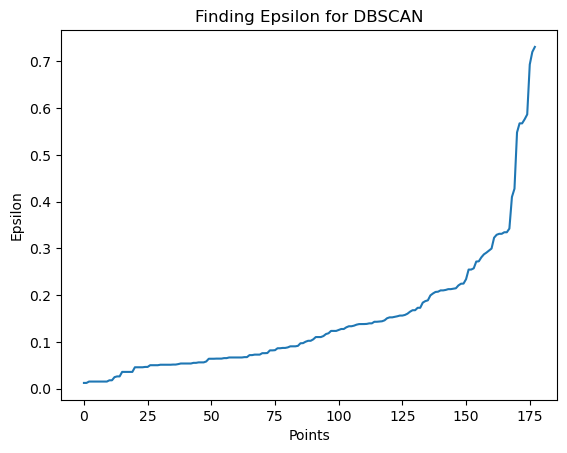

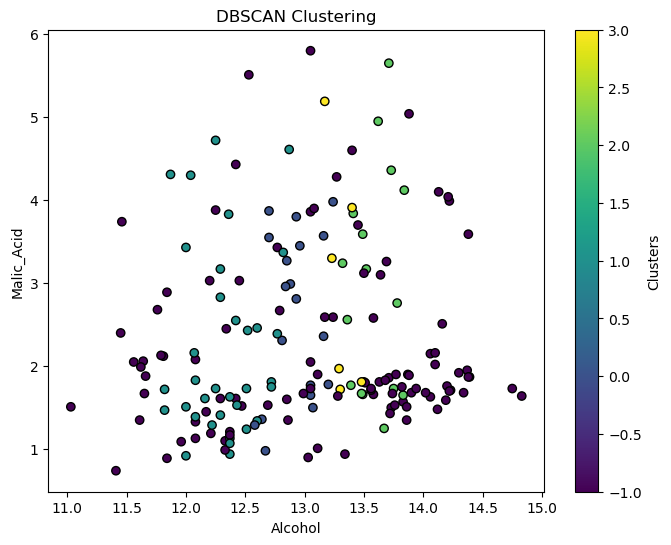

In [26]:
# Fit Nearest Neighbors model to find suitable epsilon value for DBSCAN
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(wine_scaled1)
distances, indices = neighbors_fit.kneighbors(wine_scaled1)

# Sort the distances and plot to find a suitable epsilon value
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Epsilon')
plt.title('Finding Epsilon for DBSCAN')
plt.show()

# Initialize DBSCAN with the determined epsilon value
epsilon = 0.4
dbscan1 = DBSCAN(eps=epsilon, min_samples=15)  

# Fit DBSCAN to the scaled data and obtain cluster labels
db_labels1 = dbscan1.fit_predict(wine_scaled1)

# Visualize the clusters using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Y['Alcohol'], Y['Malic_Acid'], c=db_labels, cmap='viridis', edgecolor='k')
plt.xlabel('Alcohol')
plt.ylabel('Malic_Acid')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Clusters')
plt.show()


## Conclusion

Performed KMeans , Hierarchical and DBScan Clustering with different features in the wine dataset.
The results were as follows:

     features: Alcohol and Magnesium
     kmeans silhoutte score ~ 0.4171  (K=2)
     Agglomerative silhoutte score ~ 0.38013
     DBScan clusters = 5 clusters
     
     features : Alcohol and Malic Acid
     kmean sihoutte score ~ 0.48 (K=3)
     Agglomerative silhoutte score = 0.4315
     DBScan clusters = 4 clusters